In [10]:
import numpy as np
import pandas as pd
# Entorno Scikit Learn
from sklearn.neighbors import KNeighborsClassifier   # Algoritmo
from sklearn import metrics      # Metrica de desempeño ( para ver que tan bien se ajusta nuestro modelo a los datos)
from sklearn.model_selection import train_test_split    # Para dividir el conjunto de prueba y entrenamiento
from sklearn.model_selection import KFold, RepeatedKFold, cross_val_score   # Validación cruzada 
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn import preprocessing           # Libreria para reescalar los datos
from sklearn.impute import SimpleImputer    # Libreria para trabajar con datos faltantes 
from sklearn.metrics import plot_confusion_matrix
# Para gráficos
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# datos
data=pd.read_csv("https://raw.githubusercontent.com/Albertuff/Machine-Learning/master/datos/estatura_peso.csv")
data.head()

,gender,height,weight
0,0,63.2,168.7
1,0,68.7,169.8
2,0,64.8,176.6
3,0,67.9,246.8
4,1,68.9,151.6


In [6]:
X=data[["height","weight"]]
Y=data["gender"]

In [13]:
# Si definimos un modelo de 7 vecinos mas cercanos
modelo=KNeighborsClassifier(n_neighbors=7)

# Para calificar el modelo, podemos emplear una validacion cruzada tipo Hold-out
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=1234)

# Entrenamos el modelo
modelo.fit(X_train,Y_train)

# Hacemos las predicciones
prediccion=modelo.predict_proba(X_test)
prediccion

array([[0.57142857, 0.42857143],
       [0.57142857, 0.42857143],
       [0.42857143, 0.57142857],
       [0.        , 1.        ],
       [0.42857143, 0.57142857],
       [0.        , 1.        ],
       [0.42857143, 0.57142857],
       [0.57142857, 0.42857143],
       [0.42857143, 0.57142857],
       [0.71428571, 0.28571429],
       [0.71428571, 0.28571429],
       [0.14285714, 0.85714286],
       [1.        , 0.        ],
       [0.57142857, 0.42857143]])

c:\Users\alber\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


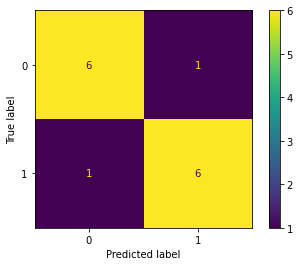

In [16]:
plot_confusion_matrix(modelo,X_test,Y_test)

In [21]:
# REporte de clasificación
from sklearn.metrics import classification_report

# Las predicciones estan en modo de probabilidades, entonces vamos a convertirlas a o y 1
pred01=(prediccion[:,1]>=0.7).astype(int)
print(classification_report(Y_test,pred01))

              precision    recall  f1-score   support

           0       0.64      1.00      0.78         7
           1       1.00      0.43      0.60         7

    accuracy                           0.71        14
   macro avg       0.82      0.71      0.69        14
weighted avg       0.82      0.71      0.69        14

